In [3]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import time
import threading
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [4]:
# Pulling CSVs for each game
df_cod = pd.read_csv('Data/combined_twitchtracker_cod.csv')
df_fortnite = pd.read_csv('Data/combined_twitchtracker_fortnite.csv')
df_lol = pd.read_csv('Data/combined_twitchtracker_lol.csv')
df_csgo = pd.read_csv('Data/combined_twitchtracker_csgo.csv')
df_amongus = pd.read_csv('Data/combined_twitchtracker_amongus_clean.csv')

In [5]:
df_amongus


,Month,Average_Stream,Gain_Stream,% Gain_Stream,Peak_Stream,Average_Views,Gain_Views,% Gain_Views,Peak_Views,Value,Gain_Hours,% Gain_Hours
0,20-Oct,151000.0,"-53,045",-26%,754000.0,3000.0,-450,-12.90%,9100.0,83.4M,-63.5M,-43.20%
1,20-Sep,204000.0,"162,989",396%,743000.0,3500.0,"2,985",598%,12400.0,147M,+116M,380%
2,20-Aug,41100.0,"35,502",629%,267000.0,499.0,445,824%,3000.0,30.6M,+26.4M,634%
3,20-Jul,5600.0,"5,473",+3.2K%,88300.0,54.0,40,286%,221.0,4.16M,+4.04M,+3.4K%
4,20-Jun,171.0,-280,-62.10%,7000.0,14.0,1,7.70%,61.0,120K,-202K,-62.70%
5,20-May,451.0,291,182%,27500.0,13.0,5,62.50%,42.0,322K,+216K,204%
6,20-Apr,160.0,42,35.60%,3800.0,8.0,3,60%,36.0,106K,+32.1K,43.60%
7,20-Mar,118.0,34,40.50%,16700.0,5.0,1,25%,22.0,73.8K,+27.8K,60.60%
8,20-Feb,84.0,6,7.70%,2400.0,4.0,2,100%,17.0,45.9K,+12.1K,35.70%
9,20-Jan,78.0,49,169%,2800.0,2.0,1,100%,11.0,33.9K,+25.6K,311%


In [6]:
month_list = df_amongus['Month']
month_list

0     20-Oct
1     20-Sep
2     20-Aug
3     20-Jul
4     20-Jun
5     20-May
6     20-Apr
7     20-Mar
8     20-Feb
9     20-Jan
10    19-Dec
11    19-Nov
12    19-Oct
13    19-Sep
14    19-Aug
15    19-Jul
16    19-Jun
17    19-May
18    19-Apr
19    19-Mar
20    19-Feb
21    19-Jan
22    18-Dec
23    18-Nov
Name: Month, dtype: object

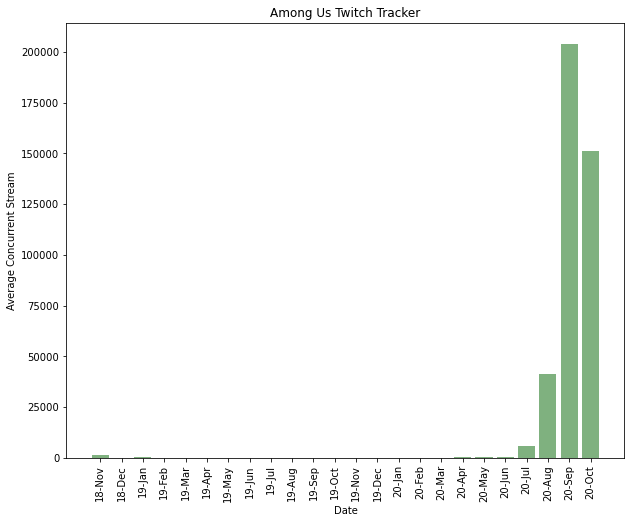

In [8]:
x_axis = month_list
y_axis = df_amongus['Average_Stream']

#Create the bar chat
plt.figure(figsize=(10,8))
plt.bar(x_axis, y_axis, color='darkgreen', alpha=0.5, align="center")
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.title("Among Us Twitch Tracker")
plt.xlabel("Date")
plt.ylabel("Average Concurrent Streams");

In [12]:
df_cod = pd.read_csv('Data/combined_twitchtracker_cod_clean.csv')
df_cod

,Month,Average_Stream,Gain_Stream,% Gain_Stream,Peak_Stream,Average_Views,Gain_Views,% Gain_Views,Peak_Views,Value,Gain_Hours,% Gain_Hours
0,20-Oct,8700.0,-230,-2.60%,22100.0,102000.0,-462,-0.50%,403000.0,"56,400,000","-17,400,000",-23.60%
1,20-Sep,8900.0,-189,-2.10%,17400.0,103000.0,"-10,619",-9.40%,364000.0,"73,800,000","-10,300,000",-12.30%
2,20-Aug,9100.0,377,4.30%,32000.0,113000.0,"-4,921",-4.20%,974000.0,"84,200,000","-3,630,000",-4.10%
3,20-Jul,8700.0,"1,170",15.50%,16600.0,118000.0,"-2,347",-1.90%,359000.0,"87,800,000","1,260,000",1.50%
4,20-Jun,7500.0,-345,-4.40%,13900.0,121000.0,"-2,486",-2%,403000.0,"86,500,000","-4,660,000",-5.10%
5,20-May,7900.0,181,2.40%,14800.0,123000.0,"11,598",10.40%,354000.0,"91,000,000","11,500,000",14.40%
6,20-Apr,7700.0,"1,947",33.90%,13200.0,111000.0,"-18,165",-14%,396000.0,"79,900,000","-16,400,000",-17.10%
7,20-Mar,5700.0,"4,364",316%,13900.0,130000.0,"116,659",902%,521000.0,"96,000,000","87,200,000",971%
8,20-Feb,1400.0,271,24.40%,3500.0,12900.0,804,6.60%,74800.0,"8,980,000","-46,400",-0.50%
9,20-Jan,1100.0,-200,-15.30%,2500.0,12100.0,"-11,671",-49%,85700.0,"9,002,000","-8,650,000",-48.90%


In [14]:
month_list = df_cod['Month']
month_list

0     20-Oct
1     20-Sep
2     20-Aug
3     20-Jul
4     20-Jun
5     20-May
6     20-Apr
7     20-Mar
8     20-Feb
9     20-Jan
10    19-Dec
11    19-Nov
12    19-Oct
13    19-Sep
14    19-Aug
15    19-Jul
16    19-Jun
17    19-May
Name: Month, dtype: object

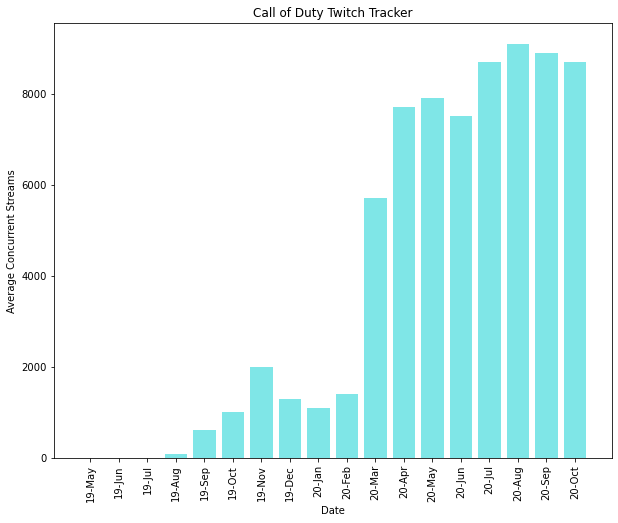

In [15]:
x_axis = month_list
y_axis = df_cod['Average_Stream']

#Create the bar chat
plt.figure(figsize=(10,8))
plt.bar(x_axis, y_axis, color='darkturquoise', alpha=0.5, align="center")
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.title("Call of Duty Twitch Tracker")
plt.xlabel("Date")
plt.ylabel("Average Concurrent Streams");

In [20]:
df_fortnite = pd.read_csv('Data/combined_twitchtracker_fortnite_clean.csv')

In [21]:
df_fortnite

,Month,Average_Stream,Gain_Stream,% Gain_Stream,Peak_Stream,Average_Views,Gain_Views,% Gain_Views,Peak_Views,Value,Gain_Hours,% Gain_Hours
0,19-Oct,5300.0,406,8.30%,43200.0,106000.0,"22,077",26.30%,1690000.0,75.3M,+14.9M,24.60%
1,19-Sep,4900.0,"-2,417",-33.10%,9600.0,83900.0,"-35,687",-29.80%,335000.0,60.4M,-28.6M,-32.10%
2,19-Aug,7300.0,-362,-4.70%,14900.0,120000.0,"-2,092",-1.70%,335000.0,89.0M,-1.52M,-1.70%
3,19-Jul,7700.0,-378,-4.70%,47300.0,122000.0,"-7,133",-5.50%,1290000.0,90.5M,-2.25M,-2.40%
4,19-Jun,8000.0,"-1,091",-11.90%,15400.0,129000.0,"-15,171",-10.50%,494000.0,92.8M,-14.3M,-13.40%
5,19-May,9100.0,"-1,325",-12.70%,55400.0,144000.0,"4,582",3.30%,642000.0,107M,+6.69M,6.70%
6,19-Apr,10500.0,-796,-7.10%,22000.0,139000.0,"3,197",2.30%,474000.0,100M,-897K,-0.90%
7,19-Mar,11300.0,494,4.60%,23500.0,136000.0,"11,243",9%,429000.0,101M,+17.3M,20.60%
8,19-Feb,10800.0,"-2,950",-21.50%,66600.0,125000.0,"-45,151",-26.50%,682000.0,84.0M,-42.6M,-33.60%
9,19-Jan,13700.0,"1,612",13.30%,56800.0,170000.0,"11,661",7.40%,762000.0,127M,+8.68M,7.40%
